# # Projet sans vent

In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

L = 20

In [2]:
choix = input('Voulez-vous choisir manuellement la direction et l intensité du vent? 1: manuellement     2: Automatiquement')
print('Vous avez choisi le choix :',choix)
choix = int(choix)

Voulez-vous choisir manuellement la direction et l intensité du vent? 1: manuellement     2: Automatiquement1
Vous avez choisi le choix : 1


In [27]:
if choix == 1:
    x = input('i_0 = ?')
    x = float(x)
    y = input('j_0 = ?')
    y = float(y)
else:
    liste1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
    liste2 = liste1
    x = choice(liste1)
    y = choice(liste2)
    print(x)
    print(y)

i_0 = ?2
j_0 = ?1


In [28]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape 

In [29]:
Matrice

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [30]:
def foyer():
    i = randint(2,L-2)
    j = randint(2,L-2)
    Matrice[i,j] = Matrice[i,j] + 1
    return (i, j)
    print(i, j)
    


In [31]:
i,j = foyer()

In [34]:
E = input('Combien de cases neutres voulez vous?')
E = int(E)
def case_neutre(Matrice,i,j):
    for h in range(E):
        i_ = randint(2,L-2)
        j_ = randint(2,L-2)
        if i != i_ and j!= j_ :
            Matrice[i_,j_] = -1

Combien de cases neutres voulez vous?5


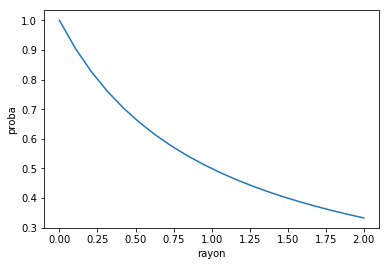

In [51]:
def proba_feu(rayon, alpha=1.0):
    p = 1.0 / ((1.0 + rayon) ** alpha)
    return p
    
r_min = 0.0
r_max = 2.0
rayons = np.linspace(r_min, r_max, num=20)
probas_feu = np.array([proba_feu(r) for r in rayons])

plt.plot(rayons, probas_feu)
plt.xlabel("rayon")
plt.ylabel("proba")

plt.show()



def matrice_proba():
    p = np.zeros((3, 3))
    i_0, j_0 = x, y
    # i_1, j_1 = ?, ?  # dépend de ventx venty
    for i in range(0, 3):
        for j in range(0, 3):
            rayon = np.sqrt((i - i_0)**2 + (j - j_0)**2)
            p[i, j] = proba_feu(rayon,alpha = 1.0)
    return p


In [52]:
p = matrice_proba()
print(p)

[[ 0.30901699  0.33333333  0.30901699]
 [ 0.41421356  0.5         0.41421356]
 [ 0.5         1.          0.5       ]]


In [53]:
def is_in_fire(cell):
    return 1 <= cell < 2

In [137]:
def propa(ancienne_matrice,nouvelle_matrice,p,i,j):
    if is_in_fire(ancienne_matrice[i,j]):  # i.e. elle est en feu        
        for di in [-1, 0 ,+1]:
            for dj in [-1, 0,+1]:
                if ancienne_matrice[i +di,j +dj] == 0: # si arbre sain
                    x = np.random.binomial(1, p[di+1, dj+1])
                    nouvelle_matrice[di +i, dj +j] = x
                else :
                    nouvelle_matrice[i +di, j+dj] = ancienne_matrice[i +di,j +dj]
        nouvelle_matrice[i,j] = nouvelle_matrice[i,j] + (1/2)
    return nouvelle_matrice

In [198]:
def filter_proba(p):
    p = p ** (T_ref/T)
    return p

In [139]:
def affiche_matrice(Matrice):
    (n,m) = Matrice.shape
    for i in range(2,n-1) :
        for j in range(2,m-1) :
            if Matrice[i,j] == 0 :
                print("A", end="")
            elif Matrice[i, j] >= 1 and Matrice[i, j] < 2 :
                print("F", end="")
            elif Matrice[i, j] >= 2 :
                print(".", end="")
            elif Matrice[i,j] < 0 :
                print(" ",end="")
        print("")        

In [148]:
def next_step(Matrice):
    new_mat = np.zeros((L,L))
    for i in range(2,L-1):
        for j in range(2,L-1): 
            if is_in_fire(Matrice[i, j]) :
                propa(Matrice, new_mat,p ,i ,j)
                
            else : new_mat[i, j] = Matrice[i,j]
    Matrice = new_mat    
    return new_mat

In [149]:
def simulation(Matrice):
    nb_pas = 100
    history = []
    history.append(Matrice.copy())
    affiche_matrice(Matrice)
    print("")
    for k in range (nb_pas):
        Matrice = next_step(Matrice)
        history.append(Matrice.copy())

        affiche_matrice(Matrice)
        print("")
    return history


In [150]:
# ma

In [152]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape
i,j = foyer()
case_neutre(Matrice,i,j)
def simulation(Matrice):
    nb_pas = 30
    history = []
    history.append(Matrice.copy())
    affiche_matrice(Matrice)
    print("")
    for k in range (nb_pas):
        Matrice = next_step(Matrice)
        history.append(Matrice.copy())
        affiche_matrice(Matrice)
        print("")
simulation(Matrice)  

AAAAAAAAAAAAAAAAA
AAA AAAAAAA AAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAA AAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAFAAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAAAA
AAA AAAAAAA AAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAA AAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAFAAAAAA
AAAAAAAAAFFAAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAAAA
AAA AAAAAAA AAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAA AAAAAAA
AAAAAAAAAAFAAAAAA
AAAAAAAAAAFAAAAAA
AAAAAAAAAF.AAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAAAA
AAA AAAAAAA AAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAA

AAAAAAAA...AAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

FFFFFFFFFFFFFFFFF
FFF FFFFFFF FFFFF
FFFFFFFFFFFFFFF..
FFFFFFFFFFFFF...A
FFFFFFFFFFF....AA
FFFFFFFFF......AA
FFFFFFF.......AAA
FFFFF........AAAA
FFF...... ..AAAAA
F...........AAAAA
...........AAAAAA
AAAAAAAA...AAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

FFFFFFFFFFFFFFFFF
FFF FFFFFFF FFFF.
FFFFFFFFFFFFFF...
FFFFFFFFFFFF....A
FFFFFFFFFF.....AA
FFFFFFFF.......AA
FFFFFF........AAA
FFFF.........AAAA
FF....... ..AAAAA
............AAAAA
...........AAAAAA
AAAAAAAA...AAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA



In [136]:
def graph2 (Matrice, i, j):
    
    # on importe tout de matplotlib
# numpy est accessible via l'alias 'np'
    from pylab import *

# on crée un graphique de 8x6 pouces 
# avec une résolution de 80 points par pouce
    figure(figsize=(8,6), dpi=80)

# on crée une nouvelle vue dans une grille de 1 ligne x 1 colonne
    subplot(2,L-1,1)

    X = (color = 'blue')
    
show()
    
    return

SyntaxError: invalid syntax (<ipython-input-136-e80dce1a4669>, line 14)

In [ ]:
graph2(Matrice,i,j)

In [ ]:
np.unique(Matrice)